## Лабораторная работа по курсу "Искусственный интеллект"

## Многослойный персептрон
|Студент| Коростелев Дмитрий |
|:-----:|:-:|
|Группа|М8О-308Б-18|
|Вариант| 11 (1) |
|Фреймворк| PyTorch |


### Настройка среды

In [1]:
%pip install pandas
%pip install numpy
%pip install torch
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'1.8.1+cpu'

Введем некоторые функции для анализа датасетов

In [3]:
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Кол-во элементов в классе")
    plt.xlabel("Номер каждого класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Количество элементов в датасете : {}".format(len(labels)))
    print("Количество атрибутов в элементе : {}".format(len(features[0])))
    print("Минимальное значение атрибута   : {}".format(np.min(features)))
    print("Максимальное значение атрибута  : {}".format(np.max(features)))
    print()

### Поготовка датасетов

Тестировать нейронные сети на основе фреймворка PyTorch будем на трех датаесетах MNIST, FashionMNIST, CIFAR-10.
#### MNIST

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

Данные для [MNIST]
Количество элементов в датасете : 42000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Обучающая выборка из MNIST]
Количество элементов в датасете : 33600
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Данные для [Тестировочная выборка из MNIST]
Количество элементов в датасете : 8400
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0



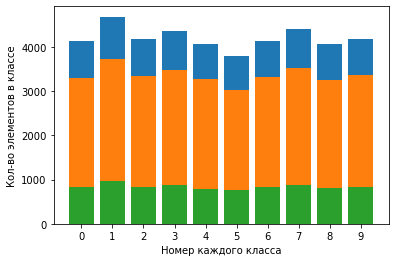

In [5]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

#### FashionMNIST

In [6]:
%cd fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y=mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y  =mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

C:\Users\Admin\fashion-mnist\utils
C:\Users\Admin\fashion-mnist
C:\Users\Admin


Данные для [Обучающая выборка из Fashion MNIST]
Количество элементов в датасете : 60000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка из Fashion MNIST]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



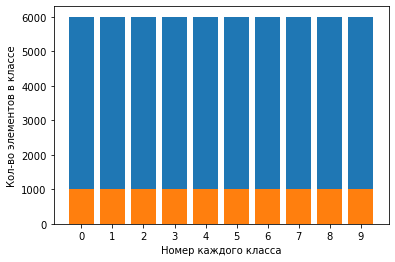

In [7]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из Fashion MNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из Fashion MNIST")

In [8]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

#### CIFAR-10

In [9]:
def unpickle_cifar(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
test_batch = unpickle_cifar('cifar-10-batches-py/test_batch')
data_batch_1 = unpickle_cifar('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle_cifar('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle_cifar('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle_cifar('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle_cifar('cifar-10-batches-py/data_batch_5')

In [10]:
print(test_batch.keys())
print(data_batch_1.keys())
print(test_batch[b'labels'])
print(test_batch[b'data'])
print(test_batch[b'data'][0])
print(len(test_batch[b'data'][0]))

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2,

In [11]:
print("Кол-во элементов в test_batch   : {}".format(len(test_batch[b'labels'])))
print("Кол-во элементов в data_batch_1 : {}".format(len(data_batch_1[b'labels'])))
print("Кол-во элементов в data_batch_2 : {}".format(len(data_batch_2[b'labels'])))
print("Кол-во элементов в data_batch_3 : {}".format(len(data_batch_3[b'labels'])))
print("Кол-во элементов в data_batch_4 : {}".format(len(data_batch_4[b'labels'])))
print("Кол-во элементов в data_batch_5 : {}".format(len(data_batch_5[b'labels'])))

Кол-во элементов в test_batch   : 10000
Кол-во элементов в data_batch_1 : 10000
Кол-во элементов в data_batch_2 : 10000
Кол-во элементов в data_batch_3 : 10000
Кол-во элементов в data_batch_4 : 10000
Кол-во элементов в data_batch_5 : 10000


In [12]:
def append_list_to_list(list1, list2):
    for value in list2:
        list1.append(value)

cifar_train_x_raw = []
cifar_train_y     = []

append_list_to_list(cifar_train_x_raw, data_batch_1[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_2[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_3[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_4[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_5[b'data'])

append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])

cifar_test_x_raw = test_batch[b'data']
cifar_test_y     = test_batch[b'labels']

Данные для [Обчающая выборка CIFAR-10]
Количество элементов в датасете : 50000
Количество атрибутов в элементе : 3072
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка CIFAR-10]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 3072
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



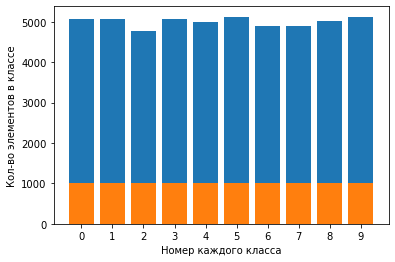

In [13]:
analyze(cifar_train_y, cifar_train_x_raw, "Обчающая выборка CIFAR-10")
analyze(cifar_test_y, cifar_test_x_raw, "Тестировочная выборка CIFAR-10")

Данные для [Тестовая выборка CIFAR-10]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 1024
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Размер тестовой выборки  : 10000
Размер обучающей выборки : 50000
Размер датасета CIFAR-10 : 60000


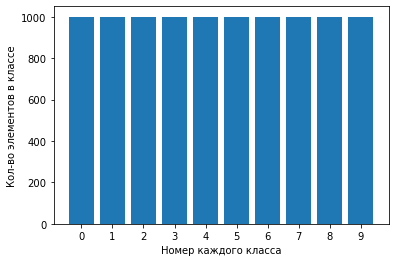

In [14]:
def conv_cifar(X):
    df = np.array(X).astype(np.float32)
    result = np.zeros(len(df) * len(df[0])//3, dtype=np.float32)
    i = 0
    for v in df:
        #print(v)
        #print(len(v))
        for j in range(0, len(v), 3):
            #print(j)
            result[i] = (v[j] + v[j+1] + v[j+2])/765
            i += 1
    return np.reshape(result ,(len(df), len(df[0])//3))


cifar_test_x  = conv_cifar(cifar_test_x_raw)
cifar_train_x = conv_cifar(cifar_train_x_raw)
analyze(cifar_test_y,cifar_test_x,"Тестовая выборка CIFAR-10")
print('Размер тестовой выборки  : {}'.format(len(cifar_test_x)))
print('Размер обучающей выборки : {}'.format(len(cifar_train_x)))
print('Размер датасета CIFAR-10 : {}'.format(len(cifar_test_x) + len(cifar_train_x)))

### Перцептрон на PyTorch

In [15]:
class PyTorchPerceptron(torch.nn.Module):
    def __init__(self, layers=[10], func=torch.nn.Sigmoid(), 
                 loss_func=torch.nn.functional.binary_cross_entropy_with_logits, 
                 epochs=10,show_status=False, learning_rate=0.05):
        super().__init__()
        self.layers=layers
        self.func=func
        self.epochs=epochs
        self.show_status=show_status
        self.learning_rate=learning_rate
        self.level=0
        self.loss_function=loss_func
    
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
        
    def fit(self, X, Y):
        self.create_net(X,Y)
        
        if self.show_status:
            self.level = 0
            self.status_print("Обучение сети:")
            self.level += 1
        
        self.train(X,Y)
        return self
        
    def create_net(self, X,Y):
        self.level=0
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        module_layers = []
        
        if self.show_status:
            self.status_print("Создание сети :")
            self.level += 1
            self.status_print("Количество скрытых слоев     : {}".format(len(layers_settings)-2))
            self.status_print("Количество входных нейронов  : {}".format(layers_settings[0]))
            self.status_print("Koличество выходных нейронов : {}".format(layers_settings[-1]))
            self.status_print("Широты скрытых слоев         : {}".format(self.layers))
            self.level -= 1
        
        for i in range(len(layers_settings)-2):
            module_layers.append(torch.nn.Linear(layers_settings[i], layers_settings[i+1]))
            module_layers.append(self.func)
            
        module_layers.append(torch.nn.Linear(layers_settings[-2], layers_settings[-1]))
        #module_layers.append(torch.nn.Softmax)
        self.net = torch.nn.Sequential(*module_layers)
        return self    

    def train(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        val_y = []
        for y in Y:
            val = np.zeros(self.classes_count)
            for i in range(10):
                val[i] = 1 if i == y else 0
            val_y.append(val.copy().astype(np.float32))
        dataset = torch.utils.data.TensorDataset(val_x,torch.tensor(val_y,dtype=torch.float32))
        dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)
        optim = torch.optim.Adam(self.net.parameters(),lr=self.learning_rate)
        for epoch in range(1, self.epochs+1):
            for (x,y) in dataloader:
                z = self.net(x)
                loss = self.loss_function(z,y)
                optim.zero_grad()
                loss.backward()
                optim.step()
            acc = self.score(X,Y)
            if self.show_status:
                self.status_print("[Эпоха {} из {}] потеря : {}, точность : {}".format(epoch, self.epochs,loss,acc))
                
    def score(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        total_success = 0
        for res, y in zip(results, Y):
            if res == y:
                total_success += 1
        acc = total_success / len(Y)
        return acc
    def confusion_matrix(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
        for res, y in zip(results, Y):
            matrix[res][y] += 1
        return matrix
        

### Тестирование MNIST
#### Однослойные перцептроны

Функция активации : Sigmoid, количество внутренних слоев : 0

In [16]:
first_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[])
first_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.08132797479629517, точность : 0.8946726190476191
  [Эпоха 2 из 10] потеря : 0.16102886199951172, точность : 0.8983035714285714
  [Эпоха 3 из 10] потеря : 0.1739923059940338, точность : 0.9000892857142857
  [Эпоха 4 из 10] потеря : 0.17695052921772003, точность : 0.902172619047619
  [Эпоха 5 из 10] потеря : 0.09303411096334457, точность : 0.8999404761904762
  [Эпоха 6 из 10] потеря : 0.17941494286060333, точность : 0.9013988095238096
  [Эпоха 7 из 10] потеря : 0.24017024040222168, точность : 0.8989583333333333
  [Эпоха 8 из 10] потеря : 0.16684845089912415, точность : 0.9066666666666666
  [Эпоха 9 из 10] потеря : 0.15890656411647797, точность : 0.9064583333333334
  [Эпоха 10 из 10] потеря : 0.09495988488197327, точность : 0.9004166666666666
Точность сети : 0.8776190476190476


Функция активации : ReLU, количество внутренних слоев : 0

In [17]:
second_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.ReLU())
second_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.10654298216104507, точность : 0.8591964285714285
  [Эпоха 2 из 10] потеря : 0.23829784989356995, точность : 0.8566369047619048
  [Эпоха 3 из 10] потеря : 0.169903963804245, точность : 0.8684226190476191
  [Эпоха 4 из 10] потеря : 0.1399296522140503, точность : 0.8628571428571429
  [Эпоха 5 из 10] потеря : 0.20759367942810059, точность : 0.8677380952380952
  [Эпоха 6 из 10] потеря : 0.26755890250205994, точность : 0.8630059523809523
  [Эпоха 7 из 10] потеря : 0.18138784170150757, точность : 0.8666071428571429
  [Эпоха 8 из 10] потеря : 0.1624613106250763, точность : 0.8636011904761904
  [Эпоха 9 из 10] потеря : 0.13253681361675262, точность : 0.8655654761904762
  [Эпоха 10 из 10] потеря : 0.203603595495224, точность : 0.8630952380952381
Точность сети : 0.8429761904761904


Функция активации : Tanh, количество внутренних слоев : 0

In [18]:
third_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Tanh())
third_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.11693225055932999, точность : 0.8944642857142857
  [Эпоха 2 из 10] потеря : 0.12001444399356842, точность : 0.9006845238095238
  [Эпоха 3 из 10] потеря : 0.15896889567375183, точность : 0.8993154761904761
  [Эпоха 4 из 10] потеря : 0.1511891931295395, точность : 0.8998809523809523
  [Эпоха 5 из 10] потеря : 0.14177891612052917, точность : 0.8993452380952381
  [Эпоха 6 из 10] потеря : 0.18151037395000458, точность : 0.8936904761904761
  [Эпоха 7 из 10] потеря : 0.19154253602027893, точность : 0.9008630952380953
  [Эпоха 8 из 10] потеря : 0.144303098320961, точность : 0.8989583333333333
  [Эпоха 9 из 10] потеря : 0.16949476301670074, точность : 0.8983630952380952
  [Эпоха 10 из 10] потеря : 0.16276392340660095, точность : 0.9030059523809524
Точность сети : 0.881547619047619


#### Двуслойные перцептроны

Функция активации : Tanh, количество внутренних слоев : 1, широты : 15

In [19]:
first_one_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[15], func=torch.nn.Tanh())
first_one_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_one_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.13074979186058044, точность : 0.7427976190476191
  [Эпоха 2 из 10] потеря : 0.15070505440235138, точность : 0.7715773809523809
  [Эпоха 3 из 10] потеря : 0.14996960759162903, точность : 0.8055059523809524
  [Эпоха 4 из 10] потеря : 0.11603017151355743, точность : 0.7698214285714285
  [Эпоха 5 из 10] потеря : 0.14829924702644348, точность : 0.7812202380952381
  [Эпоха 6 из 10] потеря : 0.13322731852531433, точность : 0.82
  [Эпоха 7 из 10] потеря : 0.09883914142847061, точность : 0.8248511904761905
  [Эпоха 8 из 10] потеря : 0.12328119575977325, точность : 0.8158035714285714
  [Эпоха 9 из 10] потеря : 0.1295205056667328, точность : 0.82375
  [Эпоха 10 из 10] потеря : 0.10952144861221313, точность : 0.8385119047619047
Точность сети : 0.8322619047619048


Функция активации : Tanh, количество внутренних слоев : 1, широты : 30

In [20]:
second_one_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[30], func=torch.nn.Tanh())
second_one_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_one_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.1803145706653595, точность : 0.8382440476190476
  [Эпоха 2 из 10] потеря : 0.16903774440288544, точность : 0.8500297619047619
  [Эпоха 3 из 10] потеря : 0.1436193883419037, точность : 0.7862202380952381
  [Эпоха 4 из 10] потеря : 0.12777088582515717, точность : 0.8472321428571429
  [Эпоха 5 из 10] потеря : 0.09379762411117554, точность : 0.8052380952380952
  [Эпоха 6 из 10] потеря : 0.03260938450694084, точность : 0.8675
  [Эпоха 7 из 10] потеря : 0.07079783827066422, точность : 0.865
  [Эпоха 8 из 10] потеря : 0.09945513308048248, точность : 0.8561904761904762
  [Эпоха 9 из 10] потеря : 0.11728264391422272, точность : 0.8770833333333333
  [Эпоха 10 из 10] потеря : 0.1012272834777832, точность : 0.8769047619047619
Точность сети : 0.8646428571428572


Функция активации : Sigmoid, количество внутренних слоев : 1, широты : 30

In [21]:
third_one_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[30])
third_one_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_one_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.19821114838123322, точность : 0.850625
  [Эпоха 2 из 10] потеря : 0.11748024076223373, точность : 0.8386011904761905
  [Эпоха 3 из 10] потеря : 0.19928069412708282, точность : 0.8332142857142857
  [Эпоха 4 из 10] потеря : 0.10684899240732193, точность : 0.8632440476190476
  [Эпоха 5 из 10] потеря : 0.09564422816038132, точность : 0.8753273809523809
  [Эпоха 6 из 10] потеря : 0.15871953964233398, точность : 0.8848214285714285
  [Эпоха 7 из 10] потеря : 0.14277133345603943, точность : 0.8953571428571429
  [Эпоха 8 из 10] потеря : 0.1063060313463211, точность : 0.89875
  [Эпоха 9 из 10] потеря : 0.13673067092895508, точность : 0.9096428571428572
  [Эпоха 10 из 10] потеря : 0.09770935773849487, точность : 0.905
Точность сети : 0.8898809523809523


#### Трехслойные перцептроны

Функция активации : Tanh, количество внутренних слоев : 2, широты : 30, 20

In [22]:
first_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[30, 20])
first_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30, 20]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.17947784066200256, точность : 0.4517559523809524
  [Эпоха 2 из 10] потеря : 0.11741620302200317, точность : 0.5545833333333333
  [Эпоха 3 из 10] потеря : 0.15232549607753754, точность : 0.6124107142857143
  [Эпоха 4 из 10] потеря : 0.17000173032283783, точность : 0.6242261904761904
  [Эпоха 5 из 10] потеря : 0.14435479044914246, точность : 0.6562202380952381
  [Эпоха 6 из 10] потеря : 0.12733617424964905, точность : 0.6561011904761904
  [Эпоха 7 из 10] потеря : 0.10445933043956757, точность : 0.7443154761904762
  [Эпоха 8 из 10] потеря : 0.11811234056949615, точность : 0.787172619047619
  [Эпоха 9 из 10] потеря : 0.18110641837120056, точность : 0.8232142857142857
  [Эпоха 10 из 10] потеря : 0.15609970688819885, точность : 0.8401190476190477
Точность сети : 0.8366666666666667


Функция активации : Sigmoid, количество внутренних слоев : 2, широты : 20, 15

In [23]:
second_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15])
second_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.16081346571445465, точность : 0.7061904761904761
  [Эпоха 2 из 10] потеря : 0.10785601288080215, точность : 0.7221726190476191
  [Эпоха 3 из 10] потеря : 0.10104911029338837, точность : 0.7838095238095238
  [Эпоха 4 из 10] потеря : 0.17067250609397888, точность : 0.8119642857142857
  [Эпоха 5 из 10] потеря : 0.104954794049263, точность : 0.8050595238095238
  [Эпоха 6 из 10] потеря : 0.11324028670787811, точность : 0.8370238095238095
  [Эпоха 7 из 10] потеря : 0.11172531545162201, точность : 0.8460119047619048
  [Эпоха 8 из 10] потеря : 0.07875431329011917, точность : 0.8580654761904762
  [Эпоха 9 из 10] потеря : 0.095058873295784, точность : 0.8681845238095238
  [Эпоха 10 из 10] потеря : 0.10797853767871857, точность : 0.8726190476190476
Точность сети : 0.865


Функция активации : ELU, количество внутренних слоев : 2, широты : 20, 15

In [24]:
third_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15], func=torch.nn.ELU())
third_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.12668220698833466, точность : 0.7812202380952381
  [Эпоха 2 из 10] потеря : 0.14716269075870514, точность : 0.7893154761904762
  [Эпоха 3 из 10] потеря : 0.12876936793327332, точность : 0.7354166666666667
  [Эпоха 4 из 10] потеря : 0.0930977612733841, точность : 0.644702380952381
  [Эпоха 5 из 10] потеря : 0.09466574341058731, точность : 0.6444940476190476
  [Эпоха 6 из 10] потеря : 0.14931532740592957, точность : 0.6393154761904762
  [Эпоха 7 из 10] потеря : 0.14495199918746948, точность : 0.6472619047619048
  [Эпоха 8 из 10] потеря : 0.10895557701587677, точность : 0.6446428571428572
  [Эпоха 9 из 10] потеря : 0.14211741089820862, точность : 0.6455952380952381
  [Эпоха 10 из 10] потеря : 0.13947579264640808, точность : 0.6508630952380953
Точность сети : 0.6419047619047619


Функция активации : Softsign, количество внутренних слоев : 2, широты : 20, 15

In [25]:
fourth_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15], func=torch.nn.Softsign())
fourth_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(fourth_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.1464604139328003, точность : 0.7975
  [Эпоха 2 из 10] потеря : 0.1352064311504364, точность : 0.8315476190476191
  [Эпоха 3 из 10] потеря : 0.12568902969360352, точность : 0.809375
  [Эпоха 4 из 10] потеря : 0.08594904839992523, точность : 0.8477678571428572
  [Эпоха 5 из 10] потеря : 0.12205708026885986, точность : 0.8701190476190476
  [Эпоха 6 из 10] потеря : 0.12221097946166992, точность : 0.8836607142857142
  [Эпоха 7 из 10] потеря : 0.13639779388904572, точность : 0.8745535714285714
  [Эпоха 8 из 10] потеря : 0.11891136318445206, точность : 0.875922619047619
  [Эпоха 9 из 10] потеря : 0.1176663190126419, точность : 0.8730952380952381
  [Эпоха 10 из 10] потеря : 0.04267604276537895, точность : 0.8720833333333333
Точность сети : 0.8697619047619047


### Тестирование FashionMNIST
#### Однослойные перцептроны
Функция активации : Softsign, количество внутренних слоев : 0

In [33]:
first_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Softsign(), learning_rate = 0.001, epochs=25)
first_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(first_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 25] потеря : 0.09079883247613907, точность : 0.8299833333333333
  [Эпоха 2 из 25] потеря : 0.08306694030761719, точность : 0.8423
  [Эпоха 3 из 25] потеря : 0.0791872963309288, точность : 0.8476333333333333
  [Эпоха 4 из 25] потеря : 0.07679319381713867, точность : 0.8504666666666667
  [Эпоха 5 из 25] потеря : 0.07514965534210205, точность : 0.8525166666666667
  [Эпоха 6 из 25] потеря : 0.07393183559179306, точность : 0.8540333333333333
  [Эпоха 7 из 25] потеря : 0.07297976315021515, точность : 0.8554166666666667
  [Эпоха 8 из 25] потеря : 0.07220697402954102, точность : 0.8565833333333334
  [Эпоха 9 из 25] потеря : 0.07156256586313248, точность : 0.8576333333333334
  [Эпоха 10 из 25] потеря : 0.07101453840732574, точность : 0.8583666666666666
  [Эпоха 11 из 25] потеря : 0.07054118812084198, точность

Функция активации : Sigmoid, количество внутренних слоев : 0

In [35]:
second_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], learning_rate = 0.001, epochs=20)
second_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.09155615419149399, точность : 0.82985
  [Эпоха 2 из 20] потеря : 0.08371435850858688, точность : 0.8418
  [Эпоха 3 из 20] потеря : 0.07979384064674377, точность : 0.8477666666666667
  [Эпоха 4 из 20] потеря : 0.07736137509346008, точность : 0.85025
  [Эпоха 5 из 20] потеря : 0.07567839324474335, точность : 0.8522333333333333
  [Эпоха 6 из 20] потеря : 0.07442181557416916, точность : 0.8539833333333333
  [Эпоха 7 из 20] потеря : 0.07343263179063797, точность : 0.85545
  [Эпоха 8 из 20] потеря : 0.07262498140335083, точность : 0.8567333333333333
  [Эпоха 9 из 20] потеря : 0.07194830477237701, точность : 0.8574166666666667
  [Эпоха 10 из 20] потеря : 0.07137057185173035, точность : 0.8582
  [Эпоха 11 из 20] потеря : 0.07087008655071259, точность : 0.859
  [Эпоха 12 из 20] потеря : 0.07043

Функция активации : Tanh, количество внутренних слоев : 0

In [36]:
second_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Tanh(), learning_rate=0.001)
second_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.09108049422502518, точность : 0.8293666666666667
  [Эпоха 2 из 10] потеря : 0.08313193917274475, точность : 0.84225
  [Эпоха 3 из 10] потеря : 0.07925044745206833, точность : 0.8476833333333333
  [Эпоха 4 из 10] потеря : 0.07688187062740326, точность : 0.8506166666666667
  [Эпоха 5 из 10] потеря : 0.07526281476020813, точность : 0.8523166666666666
  [Эпоха 6 из 10] потеря : 0.07406337559223175, точность : 0.8538833333333333
  [Эпоха 7 из 10] потеря : 0.07312346249818802, точность : 0.8553666666666667
  [Эпоха 8 из 10] потеря : 0.07235777378082275, точность : 0.8567666666666667
  [Эпоха 9 из 10] потеря : 0.07171665877103806, точность : 0.8576166666666667
  [Эпоха 10 из 10] потеря : 0.07116904854774475, точность : 0.8582833333333333
Точность сети : 0.8371


#### Двуслойные перцептроны
Функция активации : Sigmoid, количество внутренних слоев : 1, широты : 30

In [38]:
first_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[30], epochs=20, learning_rate=0.001)
first_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(first_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.07969056814908981, точность : 0.83195
  [Эпоха 2 из 20] потеря : 0.06028369814157486, точность : 0.8562333333333333
  [Эпоха 3 из 20] потеря : 0.05213577672839165, точность : 0.8661166666666666
  [Эпоха 4 из 20] потеря : 0.047642651945352554, точность : 0.8715
  [Эпоха 5 из 20] потеря : 0.04488314315676689, точность : 0.8758333333333334
  [Эпоха 6 из 20] потеря : 0.04239954799413681, точность : 0.8785666666666667
  [Эпоха 7 из 20] потеря : 0.04026580601930618, точность : 0.8812833333333333
  [Эпоха 8 из 20] потеря : 0.03871724382042885, точность : 0.8833166666666666
  [Эпоха 9 из 20] потеря : 0.03757768124341965, точность : 0.8852833333333333
  [Эпоха 10 из 20] потеря : 0.036443620920181274, точность : 0.8877333333333334
  [Эпоха 11 из 20] потеря : 0.035143036395311356, точность : 0.

Функция активации : Sigmoid, количество внутренних слоев : 1, широты : 50

In [39]:
second_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[50], learning_rate=0.001, epochs=20)
second_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [50]
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.07014402747154236, точность : 0.84425
  [Эпоха 2 из 20] потеря : 0.057749342173337936, точность : 0.8628833333333333
  [Эпоха 3 из 20] потеря : 0.04937632381916046, точность : 0.8722333333333333
  [Эпоха 4 из 20] потеря : 0.0437469407916069, точность : 0.8785666666666667
  [Эпоха 5 из 20] потеря : 0.03998696431517601, точность : 0.8829333333333333
  [Эпоха 6 из 20] потеря : 0.037875398993492126, точность : 0.887
  [Эпоха 7 из 20] потеря : 0.03563845902681351, точность : 0.8902333333333333
  [Эпоха 8 из 20] потеря : 0.03406795486807823, точность : 0.89285
  [Эпоха 9 из 20] потеря : 0.03291849419474602, точность : 0.8945833333333333
  [Эпоха 10 из 20] потеря : 0.03154469281435013, точность : 0.8961666666666667
  [Эпоха 11 из 20] потеря : 0.03007172979414463, точность : 0.89735
  [Эпоха

Функция активации : ReLU, количество внутренних слоев : 1, широты : 100

In [40]:
third_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[100], learning_rate=0.001, epochs=20, func=torch.nn.ReLU())
third_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(third_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [100]
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.07049179077148438, точность : 0.8315166666666667
  [Эпоха 2 из 20] потеря : 0.055889684706926346, точность : 0.8501833333333333
  [Эпоха 3 из 20] потеря : 0.04497046023607254, точность : 0.8593
  [Эпоха 4 из 20] потеря : 0.042487841099500656, точность : 0.86615
  [Эпоха 5 из 20] потеря : 0.033567093312740326, точность : 0.8733833333333333
  [Эпоха 6 из 20] потеря : 0.02858072891831398, точность : 0.87605
  [Эпоха 7 из 20] потеря : 0.025537440553307533, точность : 0.87995
  [Эпоха 8 из 20] потеря : 0.02300747111439705, точность : 0.8826666666666667
  [Эпоха 9 из 20] потеря : 0.02047577127814293, точность : 0.8847833333333334
  [Эпоха 10 из 20] потеря : 0.0201055146753788, точность : 0.88635
  [Эпоха 11 из 20] потеря : 0.019111238420009613, точность : 0.8903666666666666
  [Эпоха 12 из

### Тестирование CIFAR-10

Функция активации : Sigmoid, количество внутренних слоев : 1, широты : 1000

In [41]:
first_null_cf_perceptron = PyTorchPerceptron(show_status=True, layers=[324, 100], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
first_null_cf_perceptron.fit(cifar_train_x, cifar_train_y)

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 1024
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [324, 100]
Обучение сети:
  [Эпоха 1 из 50] потеря : 0.3123238682746887, точность : 0.12534
  [Эпоха 2 из 50] потеря : 0.31243205070495605, точность : 0.13698
  [Эпоха 3 из 50] потеря : 0.3161100149154663, точность : 0.14214
  [Эпоха 4 из 50] потеря : 0.3170483708381653, точность : 0.14672
  [Эпоха 5 из 50] потеря : 0.3160596787929535, точность : 0.15004
  [Эпоха 6 из 50] потеря : 0.3143133521080017, точность : 0.1523
  [Эпоха 7 из 50] потеря : 0.3114965856075287, точность : 0.15444
  [Эпоха 8 из 50] потеря : 0.31114324927330017, точность : 0.15614
  [Эпоха 9 из 50] потеря : 0.310397207736969, точность : 0.15868
  [Эпоха 10 из 50] потеря : 0.30918049812316895, точность : 0.15918
  [Эпоха 11 из 50] потеря : 0.30773696303367615, точность : 0.16084
  [Эпоха 12 из 50] потеря : 0.30636459589004517, точность : 0.16196
  [Эпоха 13 из 50]

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=1024, out_features=324, bias=True)
    (1): Tanh()
    (2): Linear(in_features=324, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [42]:
print("Точность сети : {}".format(first_null_cf_perceptron.score(cifar_test_x, cifar_test_y)))
print("Confusion matrix :")
print(first_null_cf_perceptron.confusion_matrix(cifar_test_x, cifar_test_y))

Точность сети : 0.4546
Confusion matrix :
[[457  21  73  35  50  19   6  35  70  26]
 [ 55 586  41  51  47  43  29  38  73 214]
 [ 33   9 239  48  92  45  35  33   8   6]
 [ 35  29 123 347  75 246 119  64  37  36]
 [ 30   9 115  31 291  45  73  50  11   4]
 [ 18  15  69 161  58 289  60  60  26  13]
 [ 31  20 159 123 184 112 573  53  11  29]
 [ 57  42 113  86 143 123  46 566  24  52]
 [235  91  38  39  38  38  20  31 677  99]
 [ 49 178  30  79  22  40  39  70  63 521]]


In [43]:
second_null_cf_perceptron = PyTorchPerceptron(show_status=True, layers=[], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
second_null_cf_perceptron.fit(cifar_train_x, cifar_train_y)

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 1024
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 50] потеря : 0.32779645919799805, точность : 0.1293
  [Эпоха 2 из 50] потеря : 0.32791846990585327, точность : 0.13514
  [Эпоха 3 из 50] потеря : 0.32798218727111816, точность : 0.13846
  [Эпоха 4 из 50] потеря : 0.32790249586105347, точность : 0.14046
  [Эпоха 5 из 50] потеря : 0.32774168252944946, точность : 0.14192
  [Эпоха 6 из 50] потеря : 0.32754138112068176, точность : 0.14286
  [Эпоха 7 из 50] потеря : 0.3273232579231262, точность : 0.14404
  [Эпоха 8 из 50] потеря : 0.3270980715751648, точность : 0.14498
  [Эпоха 9 из 50] потеря : 0.3268715739250183, точность : 0.14574
  [Эпоха 10 из 50] потеря : 0.32664695382118225, точность : 0.1462
  [Эпоха 11 из 50] потеря : 0.3264257311820984, точность : 0.14708
  [Эпоха 12 из 50] потеря : 0.3262089490890503, точность : 0.14756
  [Эпоха 13 из 50] потер

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [44]:
print("Точность сети : {}".format(second_null_cf_perceptron.score(cifar_test_x, cifar_test_y)))
print("Confusion matrix :")
print(second_null_cf_perceptron.confusion_matrix(cifar_test_x, cifar_test_y))

Точность сети : 0.3045
Confusion matrix :
[[243  30  71  29  46  19  13  35  42  34]
 [ 58 394  52  70  50  53  74  52  75 147]
 [  1   0  18   9  11   4   8   5   0   1]
 [133  89 273 357 282 273 349 161  73  58]
 [  1   1  16   3  46   7   9  14   0   1]
 [ 48  69 155 270 159 374 171 140  57  39]
 [ 11  23  98  32 120  29 210  21   2  24]
 [ 53  42 117  56 152  98  61 318  12  38]
 [386 206 159  99  96 106  66 113 663 236]
 [ 66 146  41  75  38  37  39 141  76 422]]


### Выводы

#### Итоги тестирования

Приведем итоговую таблицу тестрования нейросетей различной конфигурации для различных датасетов. (Лучшие нейросети выделены жирным шрифтом)

| № | Кол-во слоев | Широты | Фун-я активации | Скорость обучения | Кол-во эпох | Тестовая точность (%) | Датасет |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1| 1| 784| Sigmoid| 0.05| 10| 87.761| MNIST|
| 2| 1| 784| ReLU| 0.05| 10| 84.297| MNIST |
|**3**| **1**| **784**| **Tanh**| **0.05**| **10**| **88.154**| **MNIST** |
| 4| 2| 784-15| Tanh| 0.05| 10| 83.226| MNIST |
| 5| 2| 784-30| Tanh| 0.05| 10| 86.464| MNIST |
| **6**| **2**| **784-30**| **Sigmoid**| **0.05**| **10**| **88.988**| **MNIST**|
| 7| 3| 784-30-20| Tanh| 0.05| 10| 83.666| MNIST |
| 8| 3| 784-20-15| Sigmoid| 0.05| 10| 86.500| MNIST |
| 9| 3| 784-20-15| ELU| 0.05| 10| 64.190| MNIST |
| **10**| **3**| **784-20-15**| **Softsign**| **0.05**| **10**| **86.976**| **MNIST** |
| **11**| **1**| **784** | **Softsign**| **0.001**| **25**| **83.960**| **FashionMNIST** |
| 12| 1| 784 | Sigmoid | 0.001| 20| 83.920| FashionMNIST |
| 13| 1| 784 | Tanh | 0.001| 10| 83.710| FashionMNIST |
| 14| 2| 784-30 | Sigmoid | 0.001| 20| 86.570| FashionMNIST |
| **15**| **2**| **784-50** | **Sigmoid** | **0.001**| **20**| **87.360**| **FashionMNIST** |
| 16| 2| 784-100 | ReLU | 0.001| 20| 86.13| FashionMNIST |
| 17| 2| 1024-324-100| Sigmoid | 0.0001| 50| 45.46| CIFAR-10|
| 18| 1| 1024 | Sigmoid | 0.0001| 50| 30.450| CIFAR-10|

Распечатаем Confusion maxtrix для нейросетей, которые наиболее удачно справились с задачей.

In [48]:
print('Confusion matrix MNIST')
print(third_null_layered_perceptron.confusion_matrix(mnist_test_x, mnist_test_y))
print()
print('Confusion matrix FashionMNIST')
print(second_one_layred_fm_perceptron.confusion_matrix(fashion_mnist_test_x, fashion_mnist_test_y))

Confusion matrix MNIST
[[799   0  13   6   5   6   9   4   6  10]
 [  0 915   5   4  10   2   1   3  14   3]
 [  4   8 741  45  12   8   6  15   4   5]
 [  3   7   7 648   4  21   0   2   7   7]
 [  1   0   4   2 637   9   1   5   0  13]
 [  3  10  12  51  19 669  17   2  40  31]
 [ 15   3   9   7   3   6 769   2   7   0]
 [  0   1   9  11   8   7   1 795   4  32]
 [  8  12  29  77  17  34  19   7 729  26]
 [  0   1   0  18  79   9   1  39   8 703]]

Confusion matrix FashionMNIST
[[862   4  20  22   0   0 165   0   4   0]
 [  1 962   2   2   0   0   4   0   1   0]
 [ 21   1 781  13  98   0 111   0   6   0]
 [ 42  21  21 916  38   1  36   0   7   0]
 [  5   7 128  27 829   0 107   0   5   0]
 [  2   0   0   0   0 936   0   9   2   7]
 [ 58   4  45  14  31   0 565   0   5   1]
 [  0   0   0   0   0  39   0 970   4  43]
 [  9   1   3   6   4   2  12   0 966   0]
 [  0   0   0   0   0  22   0  21   0 949]]


В ходе лабораторной работы удалось реализовать несколько простых нейросетей с использованием фреймворка для создания нейросетей - PyTorch. Нейросети были обучены и протестированы на разных датасетаx: MNIST, FashionMNIST и CIFAR-10.
Результаты тестирования на датасетах MNIST и FashionMNIST довольно хорошие (>80%). К сожалению на датасете CIFAR-10 результаты довольно низкие, это связано с тем, что для классификации данного датасета нужно использовать сверточные слои.